About the Dataset

Column 1- id: unique Id for a news article \
Column 2- title: the title of the news article \
Column 3- author: the author of the news article \
Column 4- text: the text cointained in the article \
Column 5- label: 0 if the news is a fakenews or 1 if it is a real news.

Import dependancies

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
#Counting the number of missing values of the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

We can see that 558 titles are missing, 1957 authors and 39 body-texts are missing too. Analyzing the options that we have to manage those empty values, I decided to drop them because the population size is big enough to support a confidence level and a margin error high after drop them (I put into the sample size calculator a confidence level of 97% and margin error of 5% and, it recommended that the sample size should be 461 aprox to maintain that parameters).

In [7]:
# Replacing the missing values with null strings
df= df.fillna('')

In [8]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
# Merging the title and author columns
df['content']=df['author']+'; '+df['title']

In [12]:
df.head(2)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus; House Dem Aide: We Didn’t Even ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn; FLYNN: Hillary Clinton, Big W..."


In [14]:
X = df.drop('label',axis=1)
Y = df['label']

In [15]:
print('X values are: ', X)
print('Y values are: ', Y)

X values are:            id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                       

### Stemming Process: 

Stemming is the process of reducing  words into their root-word.

In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

Stemming function: once I give it an input value (text):

- In the first step the function sub returns us, in this case, everything from a-z or A-Z that is to say, it excludes everything that is not alphabet. If it finds a digit or special character it will replace ir by an empty space.
- Secondly, to convert all letter into lowercase because some ML models use to have some problems with uppercases.
- After that, we split the words and create a list.
- Finally, the function will do the stemming process but it will remove all the stopwords and then it will join all the results words again.


In [19]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/yesica/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
df['content'] = df['content'].apply(stemming)

In [21]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [45]:
# Let's convert the columns into arrays for our train and test sets
X = df['content'].values
Y= df['label'].values

print('The shape of X is: ', X.shape)
print('The shape of Y is: ', Y.shape)

The shape of X is:  (20800,)
The shape of Y is:  (20800,)


TfidfVectorizer: \
The method addresses the fact that all words should not be weighted equally, using the weights to indicate the words that are most unique to the document, and best used to characterize it.

In [46]:
# We have to convert all the text into some numerical singificant values to could fit our ML model. To do that, we are going to use 
# TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [47]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [48]:
#Split our train and test sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=4)

In [49]:
#Training the model.
from sklearn.linear_model import LogisticRegression


LogR= LogisticRegression()
LogR.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [50]:
# Accuracy on the test set
accuracy_test_set= LogR.score(X_test, Y_test)

print('The accuracy score of the testing set is: ', accuracy_test_set)

The accuracy score of the testing set is:  0.9742788461538462


In [77]:
yhat= LogR.predict(X_test)
yhat[0:5]

array([0, 1, 1, 1, 0])

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

#Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2077
           1       0.96      0.99      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160

Confusion matrix, without normalization
[[1989   88]
 [  19 2064]]


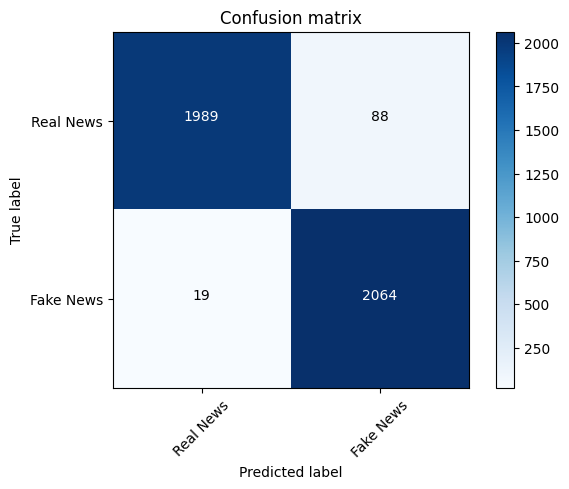

In [79]:
# Compute confusion matrix
from sklearn.feature_extraction.text import normalize


cnf_matrix = confusion_matrix(Y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['Real News', 'Fake News'], normalize=False, title='Confusion matrix')